In [1]:
#libraries
# Data
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Graphs
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
import seaborn as sns

# Preprocesing & modelling 
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler

In [2]:
# import data
# ==============================================================================
data = pd.read_csv("wine.csv")
print(data.describe())
print(data.info())
target = data['class'].tolist()

            class     Alcohol  Malic acid         Ash  Alcalinity of ash  \
count  178.000000  178.000000  178.000000  178.000000         178.000000   
mean     1.938202   13.000618    2.336348    2.366517          19.494944   
std      0.775035    0.811827    1.117146    0.274344           3.339564   
min      1.000000   11.030000    0.740000    1.360000          10.600000   
25%      1.000000   12.362500    1.602500    2.210000          17.200000   
50%      2.000000   13.050000    1.865000    2.360000          19.500000   
75%      3.000000   13.677500    3.082500    2.557500          21.500000   
max      3.000000   14.830000    5.800000    3.230000          30.000000   

        Magnesium  Total phenols  Flavanoids  Nonflavanoid phenols  \
count  178.000000     178.000000  178.000000            178.000000   
mean    99.741573       2.295112    2.029270              0.361854   
std     14.282484       0.625851    0.998859              0.124453   
min     70.000000       0.980000   

Text(0.5, 1.0, "Pearson's Correlation")

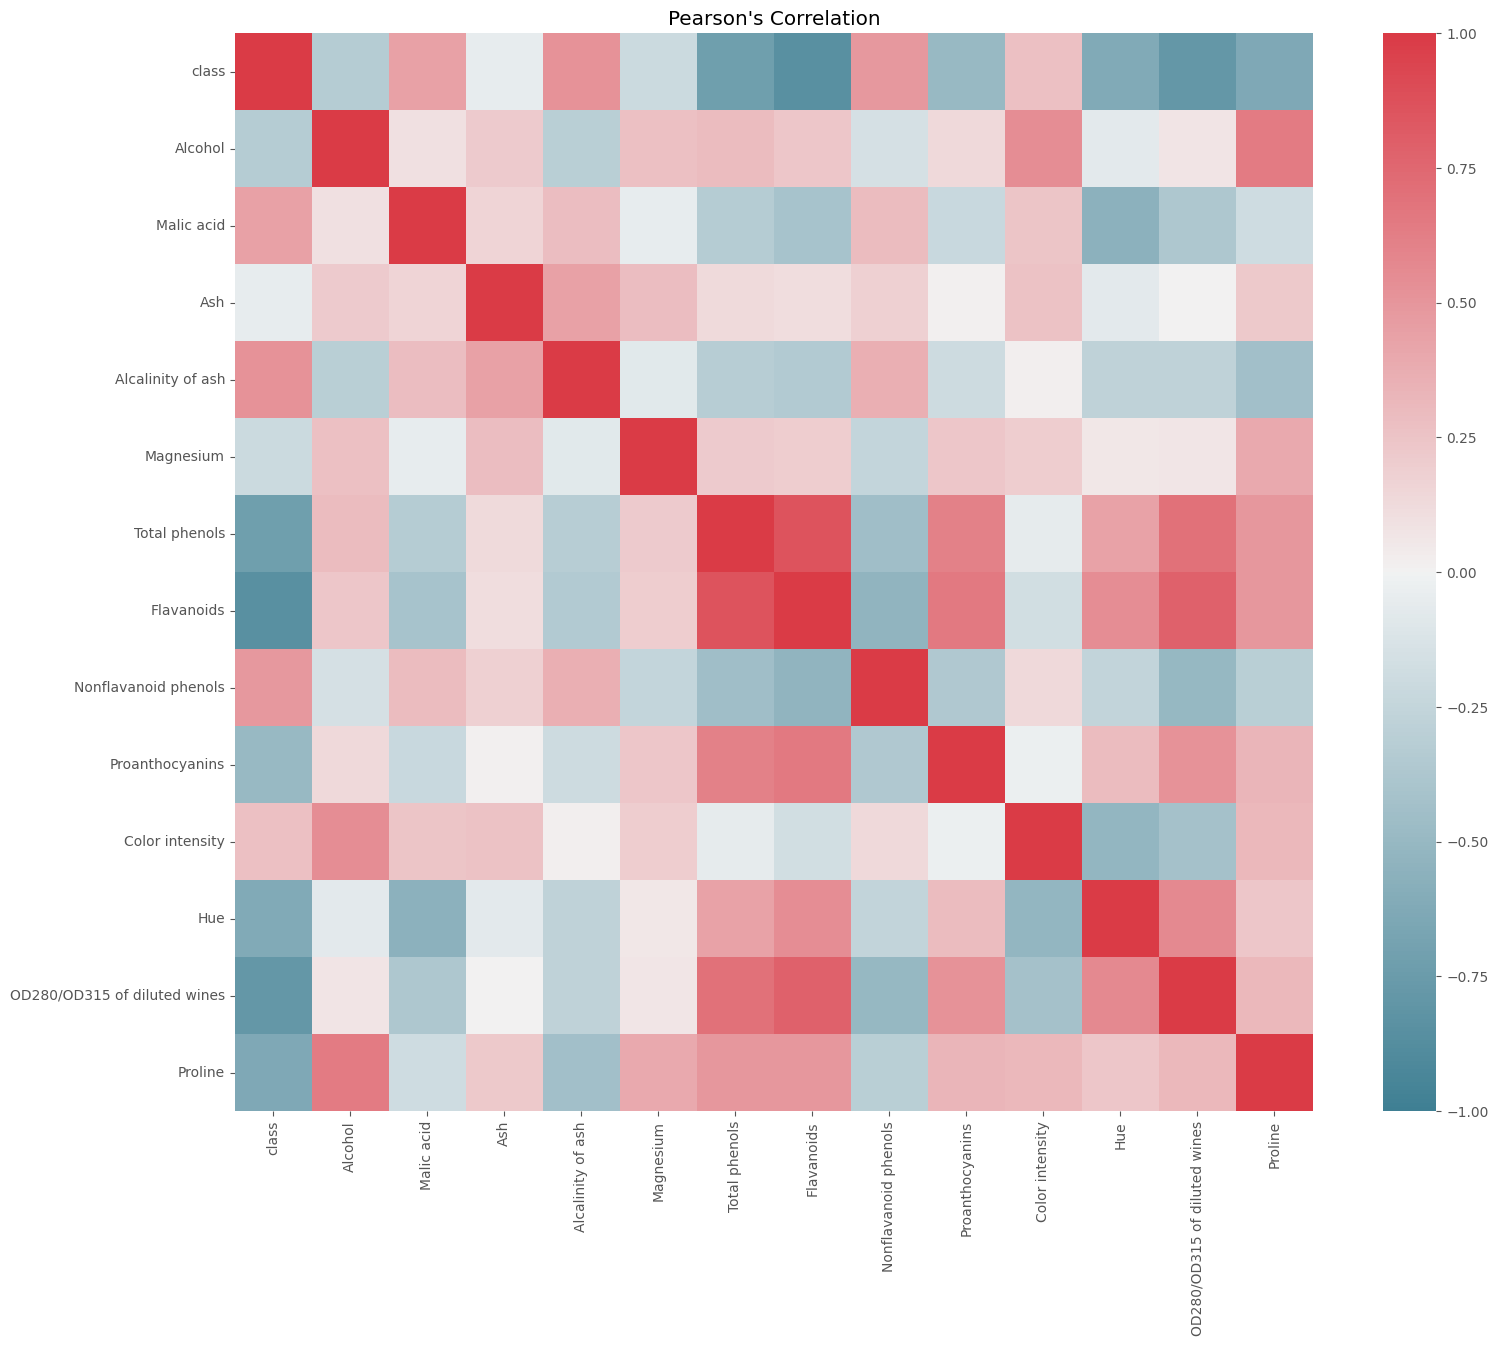

In [3]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(18, 14))
corr = data.corr()
sns_plot = sns.heatmap(corr, mask=np.zeros_like(corr,dtype=bool),
                       cmap=sns.diverging_palette(220, 10, as_cmap=True),
                       square=True, ax=ax,vmin=-1,vmax=1)
plt.title("Pearson's Correlation")


#sns_plot = sns.clustermap(my_df)
plt.title("Pearson's Correlation")

In [18]:
# clean & see
df = data.drop('class', axis=1)
#normalize data
data = (df - df.min()) / (df.max() - df.min())

#scaler = MinMaxScaler()
#model = scaler.fit(df)
#db = model.transform(df)
#data = pd.DataFrame(df)
print(data.head(1))
print('')
print('Mean:')
print(data.mean(axis=0))
print('')
print('Variance:')
print(data.var(axis=0))
data.describe()

    Alcohol  Malic acid       Ash  Alcalinity of ash  Magnesium  \
0  0.842105      0.1917  0.572193           0.257732   0.619565   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0       0.627586     0.57384              0.283019          0.59306   

   Color intensity       Hue  OD280/OD315 of diluted wines   Proline  
0         0.372014  0.455285                      0.970696  0.561341  

Mean:
Alcohol                         0.518584
Malic acid                      0.315484
Ash                             0.538244
Alcalinity of ash               0.458502
Magnesium                       0.323278
Total phenols                   0.453487
Flavanoids                      0.356386
Nonflavanoid phenols            0.437460
Proanthocyanins                 0.372523
Color intensity                 0.322363
Hue                             0.388170
OD280/OD315 of diluted wines    0.491460
Proline                         0.334446
dtype: float64

Variance:
Alcohol       

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, "Pearson's Correlation")

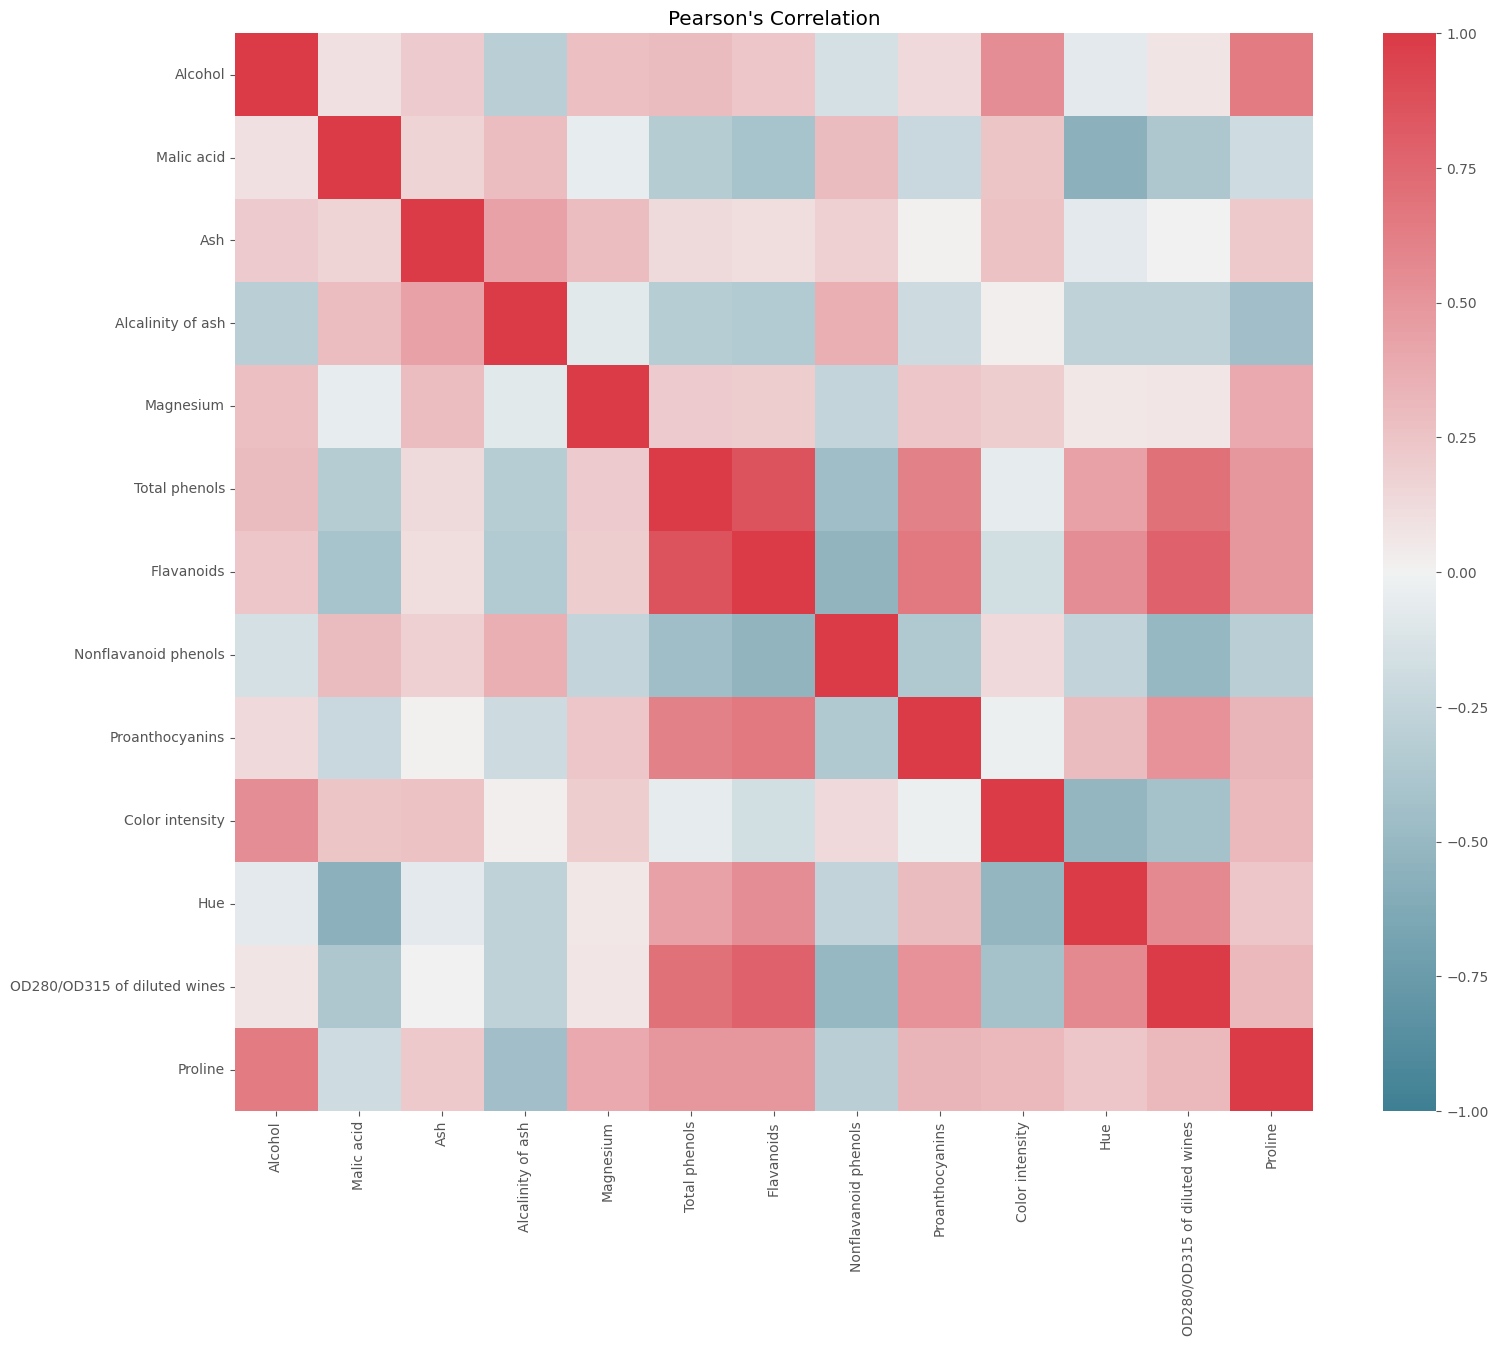

In [19]:
# run correlation matrix and plot
f2, ax2 = plt.subplots(figsize=(18, 14))
corr2 = data.corr()
sns_plot2 = sns.heatmap(corr2, mask=np.zeros_like(corr2, dtype=bool),
	cmap=sns.diverging_palette(220, 10, as_cmap=True),
	square=True, ax=ax2,vmin=-1,vmax=1)
plt.title("Pearson's Correlation")
#sns_plot = sns.clustermap(data)

Text(0.5, 1.0, "Spearman's Correlation")

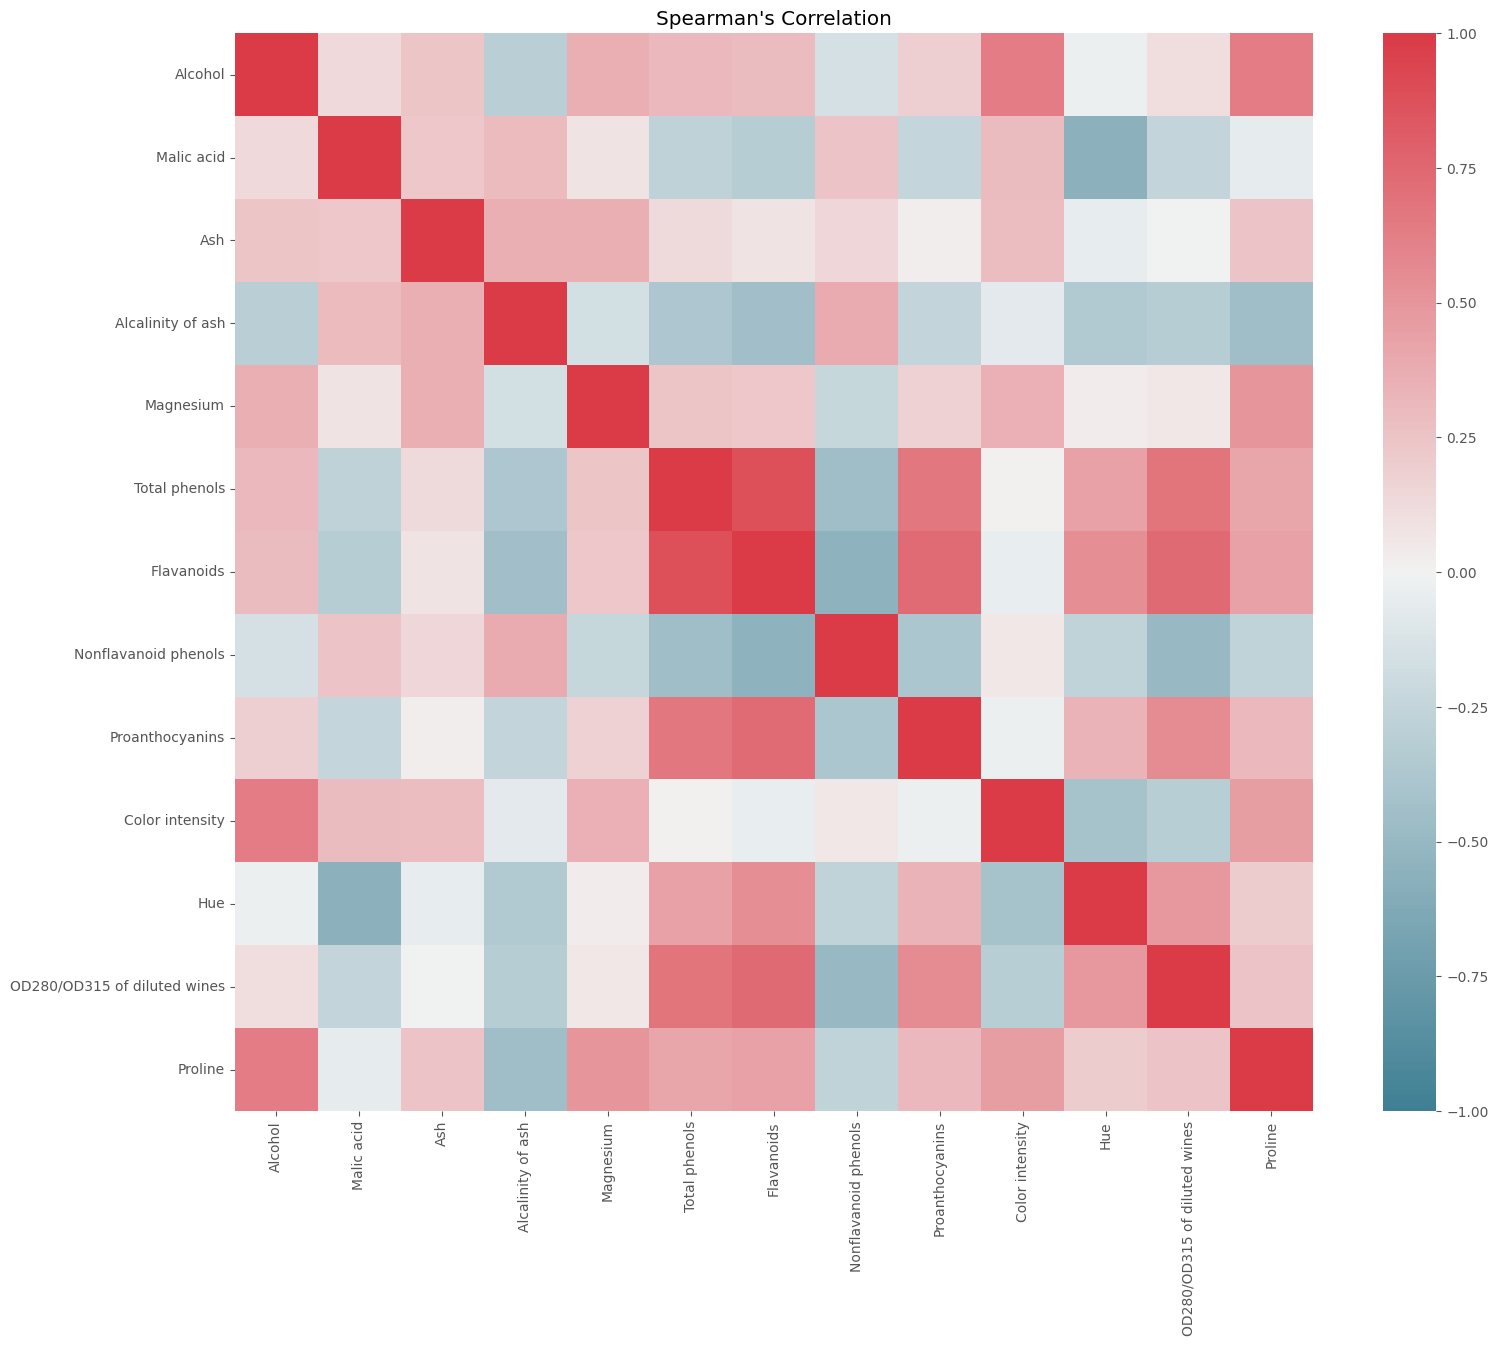

In [6]:
# run correlation matrix and plot
f3, ax3 = plt.subplots(figsize=(18, 14))
corr3 = data.corr(method="spearman")
sns_plot3 = sns.heatmap(corr3, mask=np.zeros_like(corr3, dtype=bool),
	cmap=sns.diverging_palette(220, 10, as_cmap=True),
	square=True, ax=ax3,vmin=-1,vmax=1)
plt.title("Spearman's Correlation")

Text(0.5, 1.0, "Kendall's Correlation")

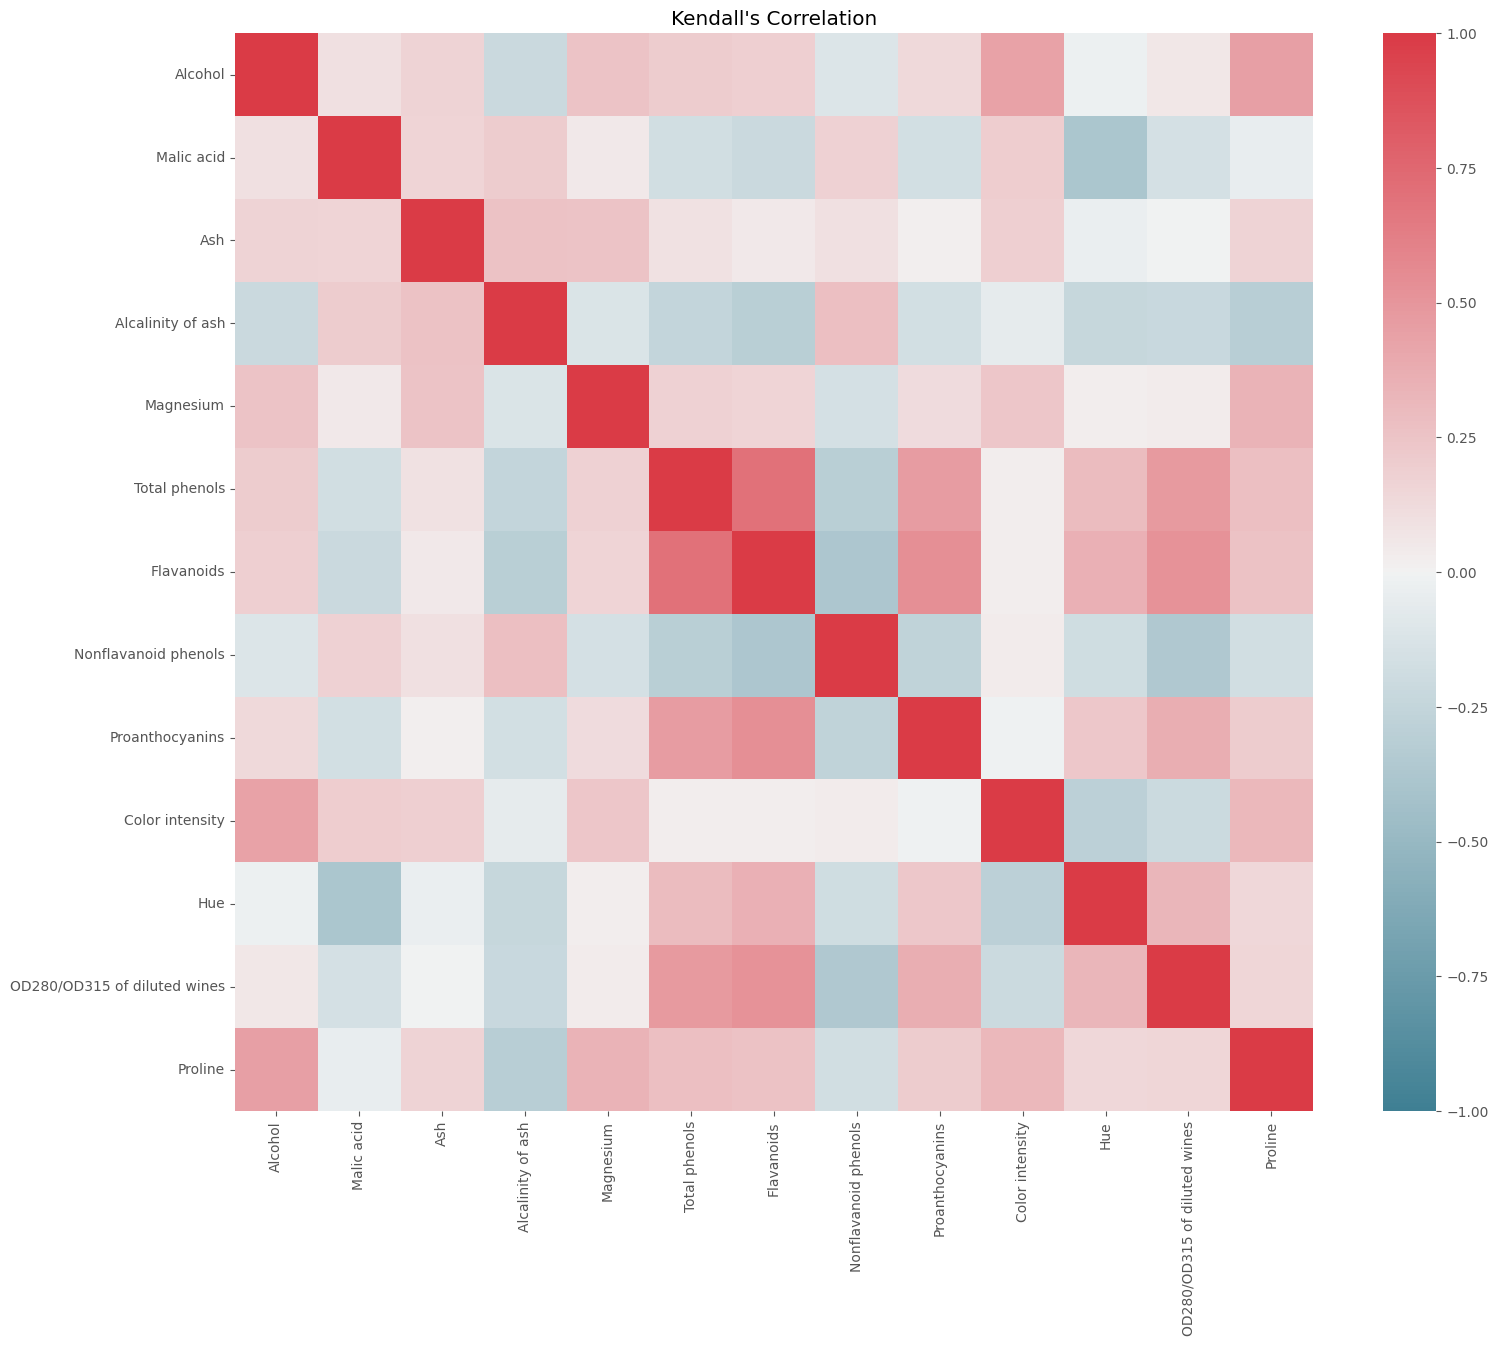

In [7]:
# run correlation matrix and plot
f4, ax4 = plt.subplots(figsize=(18, 14))
corr4 = data.corr(method="kendall")
#~ print(corr4)
sns_plot4 = sns.heatmap(corr4, mask=np.zeros_like(corr4, dtype=bool),
	cmap=sns.diverging_palette(220, 10, as_cmap=True),
	square=True, ax=ax4,vmin=-1,vmax=1)
plt.title("Kendall's Correlation")

In [3]:
data

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [6]:
#PCA training
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(data)

# Se extrae el modelo entrenado del pipeline
model_pca = pca_pipe.named_steps['pca']



# array to dataframe to add names.
dat=pd.DataFrame(
    data    = model_pca.components_,
    columns = data.columns,
    #index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13']
    #index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']
)

print(dat)

       class   Alcohol  Malic acid       Ash  Alcalinity of ash  Magnesium  \
0   0.393670 -0.136325    0.222676 -0.002258           0.224298  -0.124630   
1   0.005690  0.484161    0.223591  0.315856          -0.011616   0.300551   
2   0.001218 -0.207401    0.088796  0.626102           0.611990   0.130985   
3   0.122464 -0.081918    0.469888 -0.249841           0.071993  -0.163214   
4   0.157584 -0.250894   -0.188600 -0.093524           0.046567   0.778330   
5  -0.200339  0.135171    0.598419  0.108000          -0.088112   0.144838   
6  -0.059382 -0.092699    0.374370 -0.167089          -0.268725   0.329580   
7   0.071796  0.421544    0.087576 -0.172080           0.413249  -0.148812   
8  -0.162369 -0.450191   -0.006026  0.262494          -0.118633  -0.252536   
9   0.198994 -0.311280    0.325924  0.124523          -0.157168  -0.127734   
10  0.014442 -0.221546    0.068393 -0.494524           0.474617   0.071197   
11  0.015758 -0.264113    0.119212 -0.045023          -0.061313 

In [10]:
dat

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0.393670,-0.136325,0.222676,-0.002258,0.224298,-0.124630,-0.359264,-0.390712,0.267001,-0.279063,0.089318,-0.276823,-0.350526,-0.269515
1,0.005690,0.484161,0.223591,0.315856,-0.011616,0.300551,0.067120,-0.001313,0.026989,0.041223,0.529783,-0.277907,-0.162776,0.366059
2,0.001218,-0.207401,0.088796,0.626102,0.611990,0.130985,0.146508,0.150963,0.169976,0.149880,-0.137266,0.085329,0.166204,-0.126687
3,0.122464,-0.081918,0.469888,-0.249841,0.071993,-0.163214,0.190985,0.144617,-0.328013,0.462758,0.072112,-0.434666,0.156723,-0.255795
4,0.157584,-0.250894,-0.188600,-0.093524,0.046567,0.778330,-0.144666,-0.112006,-0.432579,0.091588,-0.046270,-0.029867,-0.144194,-0.084408
5,-0.200339,0.135171,0.598419,0.108000,-0.088112,0.144838,-0.148097,-0.062473,-0.258686,-0.466278,-0.425255,0.015651,0.217704,0.066565
6,-0.059382,-0.092699,0.374370,-0.167089,-0.268725,0.329580,-0.037898,-0.067732,0.611112,0.422923,-0.186136,0.192041,-0.078510,0.054204
7,0.071796,0.421544,0.087576,-0.172080,0.413249,-0.148812,-0.363439,-0.175405,-0.230751,0.343739,-0.040696,0.483626,-0.068651,0.111467
8,-0.162369,-0.450191,-0.006026,0.262494,-0.118633,-0.252536,-0.406374,-0.090919,-0.159123,0.265787,-0.075265,-0.212417,-0.084265,0.544905
9,0.198994,-0.311280,0.325924,0.124523,-0.157168,-0.127734,0.307723,0.140440,-0.240543,-0.108696,0.217043,0.509661,-0.455705,0.046208


In [9]:
dat.shape

(14, 14)

Text(0.5, 1.0, 'PCA components')

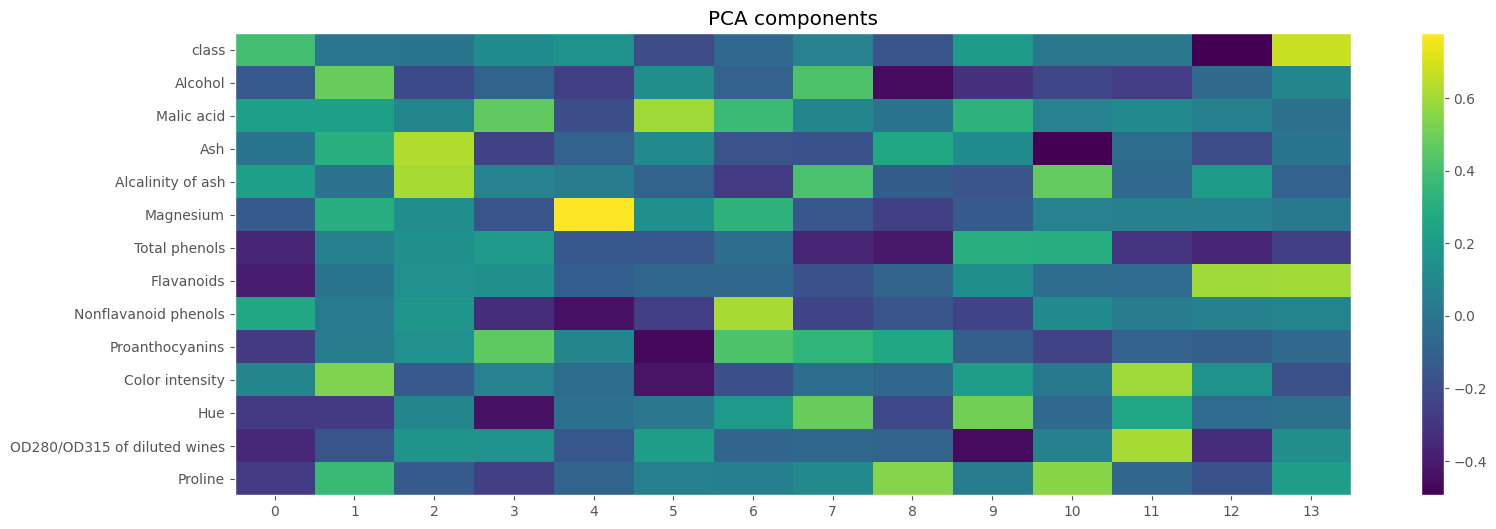

In [11]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 6))
components = model_pca.components_
plt.imshow(components.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(data.columns)), data.columns)
plt.xticks(range(len(data.columns)), dat.index)
plt.grid(False)
plt.colorbar();
plt.title("PCA components")
#fig.savefig("output_pca.png")


[0.39542486 0.57378745 0.67707846 0.74335831 0.80603706 0.85409266
 0.89364973 0.91865217 0.93969088 0.95842703 0.97455906 0.98661596
 0.99587055 1.        ]


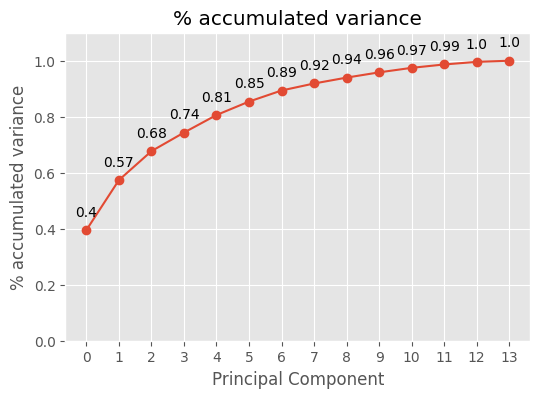

In [12]:
# % accumulated variance
# ==============================================================================
prop_variance_acum = model_pca.explained_variance_ratio_.cumsum()
print(prop_variance_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(data.columns)) + 1,
    prop_variance_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(data.columns)) + 1, prop_variance_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(model_pca.n_components_) + 1)
ax.set_xticklabels(dat.index)
ax.set_title('% accumulated variance')
ax.set_xlabel('Principal Component')
ax.set_ylabel('% accumulated variance');

fig.savefig("output_pca1.png")

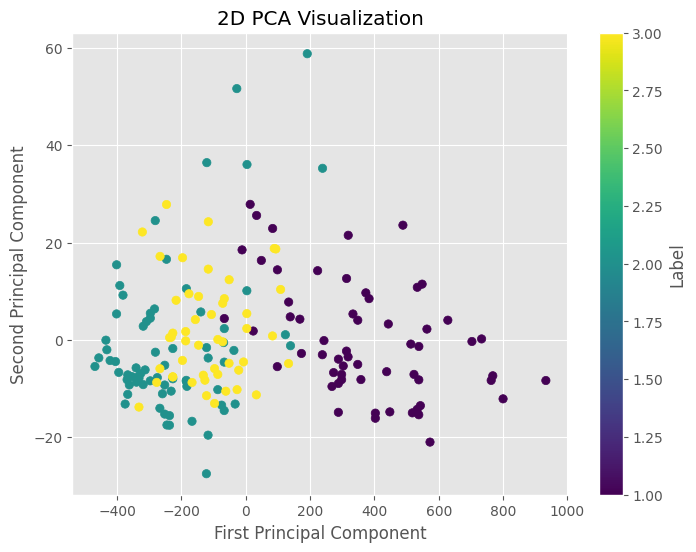

In [16]:
# Fit PCA to the data and transform it
pca_res = model_pca.fit_transform(data)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_res[:, 0], pca_res[:, 1], c=target, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('2D PCA Visualization')
plt.colorbar(scatter, label='Label') # Add a color bar for reference
plt.grid(True)
plt.show()

In [15]:
pca_res.shape

(178, 14)